# Pymaceuticals Inc.
---

### Analysis

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study =pd.merge(study_results,mouse_metadata, how="right", on="Mouse ID") 
print(mouse_study.shape)

# Display the data table for preview
mouse_study.head()sis here.
total_mice = mouse_metadata.nunique
total_mice
duplicate_mouse = mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_mouse
extra_mice = mouse_study.loc[duplicate_mouse,'Mouse ID'].unique()
extra_mice
clean_mouse_data = mouse_study[mouse_study["Mouse ID"]!= "g989"]
clean_mouse_data
clean_mouse_data.nunique()
tumor_mean = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_summary_df = pd.DataFrame({"Tumor Mean Volume":tumor_mean,
                                 "Tumor Median Volume":tumor_median,
                                 "Tumor Variance Volume":tumor_var,
                                 "Tumor Volume Standard Deviation":tumor_std})
tumor_summary_df
import matplotlib.pyplot as plt
import numpy as np

bar_mouse_data = clean_mouse_data["Drug Regimen"].value_counts()
bar_mouse_data.plot(kind="bar", xlabel="Drug Regimen", ylabel="Timpoints" )
plt.bar(bar_mouse_data.index, bar_mouse_data.values)
mouse_piechart = clean_mouse_data["Sex"].value_counts()
mouse_piechart.plot(kind="pie",autopct="%1.1f%%") 
plt.pie(mouse_piechart.values, labels=mouse_piechart.index,autopct="%1.1f%%")
plt.show()
# Start by getting the last (greatest) timepoint for each mouse
tumor_finalvolume = clean_mouse_data.groupby("Mouse ID")["Timepoint"].max().reset_index()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_timepoint = tumor_finalvolume.merge(clean_mouse_data, how="left",on=["Mouse ID","Timepoint"])
tumor_timepoint

#And then for the metrics calculation and IQR, lowerq, upperq and all, we need to compare to the specific drug type
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

for drugs in treatment: 

# Create empty list to fill with tumor vol data (for plotting)
    tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. - BCBS Support Helped me with the following code
    final_tumor_vol = tumor_timepoint.loc[tumor_timepoint["Drug Regimen"]==drugs,"Tumor Volume (mm3)"]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data.append(final_tumor_vol)
    
    # add subset 
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound)|(final_tumor_vol > upper_bound)]   
    # Determine outliers using upper and lower bounds
    print(f"{drugs} Outliers are; {outliers}")
    # Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()

ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(final_tumor_vol)
plt.show()

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study =pd.merge(study_results,mouse_metadata, how="right", on="Mouse ID") 
print(mouse_study.shape)

# Display the data table for preview
mouse_study.head()


(1893, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [3]:
# Checking the number of mice.
total_mice = mouse_metadata.nunique
total_mice

<bound method DataFrame.nunique of     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]>

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_mouse
extra_mice = mouse_study.loc[duplicate_mouse,'Mouse ID'].unique()
extra_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_study[mouse_study["Mouse ID"]!= "g989"]
clean_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data.nunique()

Mouse ID               248
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_summary_df = pd.DataFrame({"Tumor Mean Volume":tumor_mean,
                                 "Tumor Median Volume":tumor_median,
                                 "Tumor Variance Volume":tumor_var,
                                 "Tumor Volume Standard Deviation":tumor_std})
tumor_summary_df

,Tumor Mean Volume,Tumor Median Volume,Tumor Variance Volume,Tumor Volume Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Timpoints'>

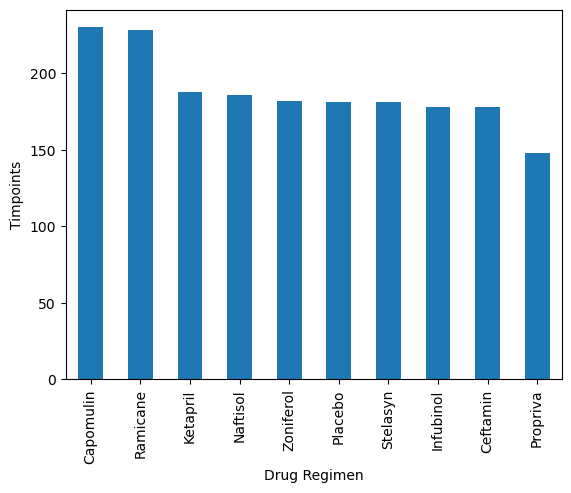

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import matplotlib.pyplot as plt
import numpy as np

bar_mouse_data = clean_mouse_data["Drug Regimen"].value_counts()
bar_mouse_data.plot(kind="bar", xlabel="Drug Regimen", ylabel="Timpoints" )


<BarContainer object of 10 artists>

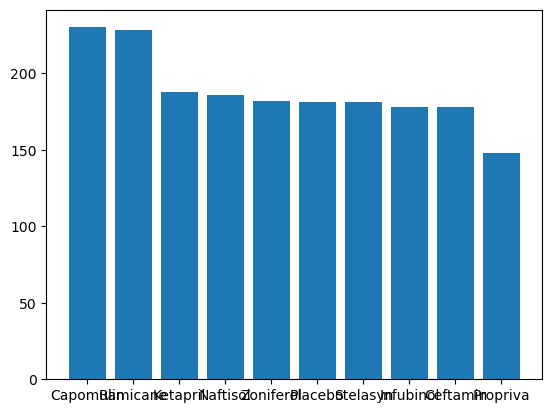

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar_mouse_data.index, bar_mouse_data.values)

<Axes: ylabel='Sex'>

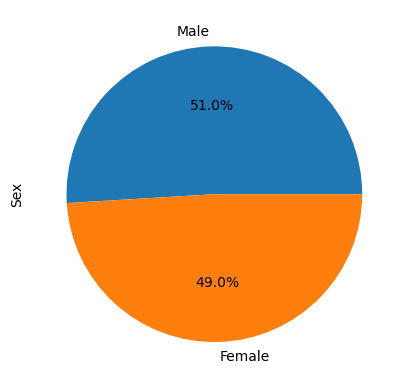

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_piechart = clean_mouse_data["Sex"].value_counts()
mouse_piechart.plot(kind="pie",autopct="%1.1f%%") 

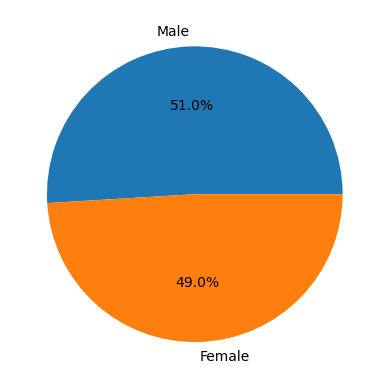

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_piechart.values, labels=mouse_piechart.index,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
tumor_finalvolume = clean_mouse_data.groupby("Mouse ID")["Timepoint"].max().reset_index()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_timepoint = tumor_finalvolume.merge(clean_mouse_data, how="left",on=["Mouse ID","Timepoint"])
tumor_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [34]:
#And then for the metrics calculation and IQR, lowerq, upperq and all, we need to compare to the specific drug type
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

for drugs in treatment: 

# Create empty list to fill with tumor vol data (for plotting)
    tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    final_tumor_vol = tumor_timepoint.loc[tumor_timepoint["Drug Regimen"]==drugs,"Tumor Volume (mm3)"]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data.append(final_tumor_vol)
    
    # add subset 
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound)|(final_tumor_vol > upper_bound)]   
    # Determine outliers using upper and lower bounds
    print(f"{drugs} Outliers are; {outliers}")

Capomulin Outliers are; Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Outliers are; Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Outliers are; 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Outliers are; Series([], Name: Tumor Volume (mm3), dtype: float64)


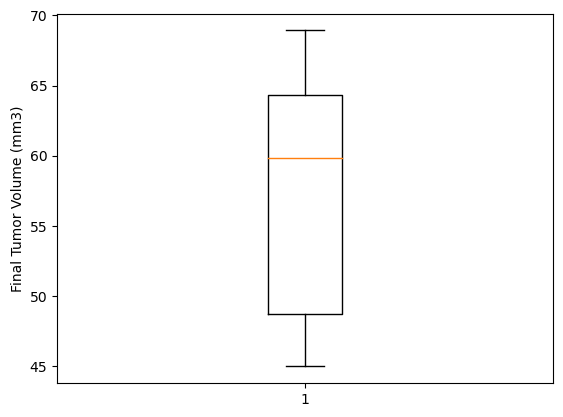

In [38]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()

ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(final_tumor_vol)
plt.show()

## Line and Scatter Plots

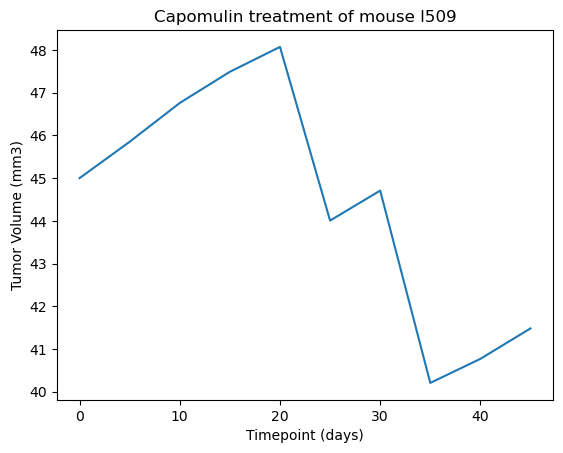

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis = 

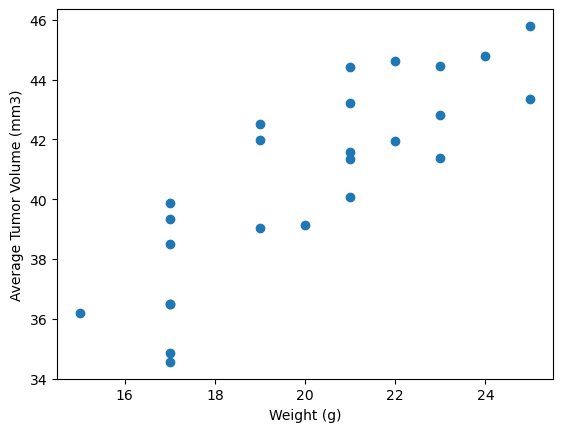

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


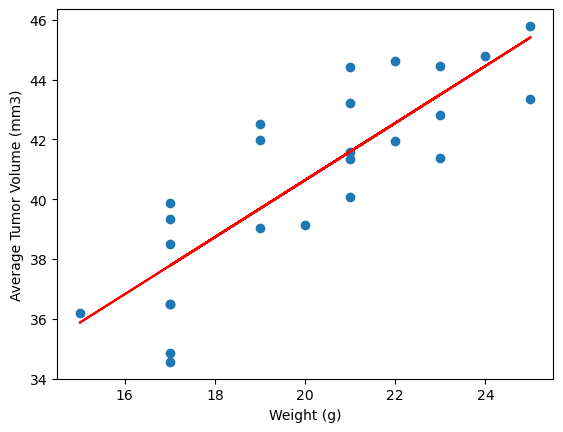

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
